In [1]:
import pandas as pd

In [2]:
df_inat =  pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"', usecols=[
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
])

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/1441865066.py:1: DtypeWarning: Columns (138,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inat =  pd.read_csv('../data/gbif/occurrence.txt', delimiter='\t', quotechar='"', usecols=[


In [3]:
df_inat.shape

(3321454, 9)

In [4]:
df_inat_22 = pd.read_csv('../data/gbif_22/occurrence.txt', delimiter='\t', quoting=3, usecols=[
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
])

In [5]:
df_inat_22.shape

(6686625, 9)

In [6]:
rel_columns_iNat = [
    'taxonID',
    'taxonKey',
    'countryCode',
    'stateProvince',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'acceptedScientificName',
    'scientificName',
]
rel_columns_eBird = [
    'TAXON CONCEPT ID',
    'OBSERVATION COUNT',
    'COUNTRY',
    'STATE',
    'LATITUDE',
    'LONGITUDE',
    'OBSERVATION DATE',
    'SCIENTIFIC NAME',
    'COMMON NAME',
]

In [7]:
print(f"Total number of records: \n{df_inat.shape[0]:,} for 2019\n{df_inat_22.shape[0]:,} for 2022")

Total number of records: 
3,321,454 for 2019
6,686,625 for 2022


In [8]:
df_eBird = pd.read_csv('../data/eBird/ebd_US-CA_201901_201912_relApr-2023/ebd_US-CA_201901_201912_relApr-2023.txt', sep='\t', usecols=rel_columns_eBird)

In [9]:
df_eBird_22 = pd.read_csv('../data/eBird_ebd_US-CA_202201_202212_relSep-2023/ebd_US-CA_202201_202212_relSep-2023.txt', sep='\t', usecols=rel_columns_eBird)

In [10]:
print(f"Total number of records for eBird: \n{df_eBird.shape[0]:,} for 2019\n{df_eBird_22.shape[0]:,} for 2022")

Total number of records for eBird: 
8,694,926 for 2019
12,673,675 for 2022


In [11]:
df_iNat2 = df_inat[rel_columns_iNat].copy()
df_eBird2 = df_eBird[rel_columns_eBird].copy()
df_iNat2_22 = df_inat_22[rel_columns_iNat].copy()
df_eBird2_22 = df_eBird_22[rel_columns_eBird].copy()

In [12]:
df_iNat2.head()

,taxonID,taxonKey,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,acceptedScientificName,scientificName
0,123045,2515238.0,US,California,34.140209,-119.187897,2019-01-30T09:59:56,Puccinia evadens Harkn.,Puccinia evadens Harkn.
1,84994,5156078.0,US,Florida,28.059126,-82.418194,2019-01-21T14:35:00,"Acanthocephala declivis (Say, 1832)","Acanthocephala declivis (Say, 1832)"
2,36204,2451234.0,US,California,35.271399,-120.888941,2019-03-17T13:56:00,"Sceloporus occidentalis Baird & Girard, 1852","Sceloporus occidentalis Baird & Girard, 1852"
3,53326,3169708.0,US,Georgia,33.769633,-84.30645,2019-03-29T14:33:23,Vinca major L.,Vinca major L.
4,9176,5231132.0,US,Texas,33.562034,-101.809798,2019-04-02T12:44:00,"Zonotrichia leucophrys (J.R.Forster, 1772)","Zonotrichia leucophrys (J.R.Forster, 1772)"


In [13]:
df_iNat2['countryCode'].value_counts()

US    3321452
Name: countryCode, dtype: int64

In [14]:
df_iNat2_22['countryCode'].value_counts()

US    6686625
Name: countryCode, dtype: int64

# eBird Analysis

In [15]:
df_eBird2['COUNTRY'].value_counts()

United States    8694926
Name: COUNTRY, dtype: int64

In [16]:
df_eBird2_22['COUNTRY'].value_counts()

United States    12673675
Name: COUNTRY, dtype: int64

In [17]:
df_eBird2['STATE'].value_counts()

California    8694926
Name: STATE, dtype: int64

In [18]:
df_eBird2_22['STATE'].value_counts()

California    12673675
Name: STATE, dtype: int64

In [19]:
df_eBird2.head()

,TAXON CONCEPT ID,OBSERVATION COUNT,COUNTRY,STATE,LATITUDE,LONGITUDE,OBSERVATION DATE,SCIENTIFIC NAME,COMMON NAME
0,avibase-CA08045E,1,United States,California,37.892331,-122.311800,2019-01-13,Accipiter sp.,Accipiter sp.
1,avibase-CA08045E,X,United States,California,37.871270,-122.307890,2019-01-01,Accipiter sp.,Accipiter sp.
2,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,Accipiter sp.
3,avibase-CA08045E,1,United States,California,37.695328,-121.844741,2019-01-10,Accipiter sp.,Accipiter sp.
4,avibase-CA08045E,1,United States,California,37.834029,-122.238747,2019-01-25,Accipiter sp.,Accipiter sp.


In [20]:
df_eBird2['AVIBASEID'] = df_eBird2['TAXON CONCEPT ID'].apply(lambda x : x[-8:])
df_eBird2_22['AVIBASEID'] = df_eBird2_22['TAXON CONCEPT ID'].apply(lambda x : x[-8:])

# EDA on the whole dataset without any filters

In [21]:
print(f"""
    Some important statistics:
    +-------+------+------------+
    | eBird | 2019 | {df_eBird2.shape[0]:,} |
    | eBird | 2022 | {df_eBird2_22.shape[0]:,} |
    | iNat  | 2019 | {df_iNat2.shape[0]:,} |
    | iNat  | 2022 | {df_iNat2_22.shape[0]:,} |
""")


    Some important statistics:
    +-------+------+------------+
    | eBird | 2019 | 8,694,926 |
    | eBird | 2022 | 12,673,675 |
    | iNat  | 2019 | 3,321,454 |
    | iNat  | 2022 | 6,686,625 |



In [22]:
print(f"""
    Some important statistics:
    +-------+------+-----------------+---------------+
    | data  | year | category        | value         |
    | eBird | 2019 | nunique species | {df_eBird2['TAXON CONCEPT ID'].nunique():,} |
    | eBird | 2022 | nunique species | {df_eBird2_22['TAXON CONCEPT ID'].nunique():,} |
    | iNat  | 2019 | nunique species | {df_iNat2['taxonID'].nunique():,} |
    | iNat  | 2022 | nunique species | {df_iNat2_22['taxonID'].nunique():,} |
""")


    Some important statistics:
    +-------+------+-----------------+---------------+
    | data  | year | category        | value         |
    | eBird | 2019 | nunique species | 1,088 |
    | eBird | 2022 | nunique species | 1,108 |
    | iNat  | 2019 | nunique species | 49,685 |
    | iNat  | 2022 | nunique species | 58,267 |



In [23]:
df_eBird_median_by_species = df_eBird2[df_eBird2['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()
df_eBird_median_by_species_22 = df_eBird2_22[df_eBird2_22['OBSERVATION COUNT']!='X'].groupby('AVIBASEID')['OBSERVATION COUNT'].median().to_dict()

In [24]:
df_eBird2['OBSCOUNT'] = df_eBird2[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)
df_eBird2_22['OBSCOUNT'] = df_eBird2_22[['AVIBASEID','OBSERVATION COUNT']].apply(
    lambda row: (df_eBird_median_by_species[row['AVIBASEID']] if row['AVIBASEID'] in df_eBird_median_by_species else 1) if row['OBSERVATION COUNT'] == 'X' else row['OBSERVATION COUNT'],
    axis=1
)

In [25]:
df_eBird2['OBSCOUNT'] = df_eBird2['OBSCOUNT'].astype(float)
df_eBird2_22['OBSCOUNT'] = df_eBird2_22['OBSCOUNT'].astype(float)

In [26]:
print(f"""
    Some important statistics:
    +-------+------+----------+---------------+----------------+
    | data  | year | category |  value  \t| increase (%) \t|
    | eBird | 2019 | num rows | {df_eBird2.shape[0]:,} \t|     NaN \t|
    | eBird | 2022 | num rows | {df_eBird2_22.shape[0]:,} \t| {100*(df_eBird2_22.shape[0]-df_eBird2.shape[0])/df_eBird2.shape[0]:.4f}\t |
    | eBird | 2019 | agg rows | {df_eBird2['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 | agg rows | {df_eBird2_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird2_22['OBSCOUNT'].sum() - df_eBird2['OBSCOUNT'].sum())/df_eBird2['OBSCOUNT'].sum():.4f}\t |
    | iNat  | 2019 | num rows | {df_iNat2.shape[0]:,} \t|     NaN \t|
    | iNat  | 2022 | num rows | {df_iNat2_22.shape[0]:,} \t| {100*(df_iNat2_22.shape[0]-df_iNat2.shape[0])/df_iNat2.shape[0]:.4f}\t |
""")


    Some important statistics:
    +-------+------+----------+---------------+----------------+
    | data  | year | category |  value  	| increase (%) 	|
    | eBird | 2019 | num rows | 8,694,926 	|     NaN 	|
    | eBird | 2022 | num rows | 12,673,675 	| 45.7594	 |
    | eBird | 2019 | agg rows | 255,405,907.5 	|     NaN 	|
    | eBird | 2022 | agg rows | 372,180,164.5 	| 45.7210	 |
    | iNat  | 2019 | num rows | 3,321,454 	|     NaN 	|
    | iNat  | 2022 | num rows | 6,686,625 	| 101.3162	 |



# Beginning the filtering

In [27]:
df_eBird3 = df_eBird2[
    (df_eBird2['LATITUDE']>=36.4701132878)
    &
    (df_eBird2['LATITUDE']<=42.009518)
    &
    (df_eBird2['LONGITUDE']>= -124.409591)
    &
    (df_eBird2['LONGITUDE']<= -114.131211)
].copy()
df_eBird3_22 = df_eBird2_22[
    (df_eBird2_22['LATITUDE']>=36.4701132878)
    &
    (df_eBird2_22['LATITUDE']<=42.009518)
    &
    (df_eBird2_22['LONGITUDE']>= -124.409591)
    &
    (df_eBird2_22['LONGITUDE']<= -114.131211)
].copy()

In [28]:
df_eBird3['observation_datetime'] = pd.to_datetime(df_eBird3['OBSERVATION DATE'])
df_eBird3_22['observation_datetime'] = pd.to_datetime(df_eBird3_22['OBSERVATION DATE'])

In [29]:
df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week
df_eBird3_22['WEEK'] = df_eBird3_22['observation_datetime'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/1873497601.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3['WEEK'] = df_eBird3['observation_datetime'].dt.week
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/1873497601.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_eBird3_22['WEEK'] = df_eBird3_22['observation_datetime'].dt.week


In [30]:
df_eBird3['YEAR'] = df_eBird3['observation_datetime'].dt.year
df_eBird3_22['YEAR'] = df_eBird3_22['observation_datetime'].dt.year

In [31]:
df_iNat2['countryCode'].value_counts(),\
df_iNat2_22['countryCode'].value_counts()

(US    3321452
 Name: countryCode, dtype: int64,
 US    6686625
 Name: countryCode, dtype: int64)

In [32]:
df_iNat2['observation_dt'] = pd.to_datetime(df_iNat2['eventDate'])
df_iNat2_22['observation_dt'] = pd.to_datetime(df_iNat2_22['eventDate'])

In [33]:
df_iNat3 = df_iNat2[df_iNat2['stateProvince'] == 'California'].copy()
df_iNat3_22 = df_iNat2_22[df_iNat2_22['stateProvince'] == 'California'].copy()

In [34]:
df_iNat3['decimalLatitude'] = df_iNat3['decimalLatitude'].astype(float)
df_iNat3['decimalLongitude'] = df_iNat3['decimalLongitude'].astype(float)
df_iNat3_22['decimalLatitude'] = df_iNat3_22['decimalLatitude'].astype(float)
df_iNat3_22['decimalLongitude'] = df_iNat3_22['decimalLongitude'].astype(float)

In [35]:
df_iNat4 = df_iNat3[
    (df_iNat3['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3['decimalLatitude']<=42.009518)
    &
    (df_iNat3['decimalLongitude']>= -124.409591)
    &
    (df_iNat3['decimalLongitude']<= -114.131211)
].copy()
df_iNat4_22 = df_iNat3_22[
    (df_iNat3_22['decimalLatitude']>=36.4701132878)
    &
    (df_iNat3_22['decimalLatitude']<=42.009518)
    &
    (df_iNat3_22['decimalLongitude']>= -124.409591)
    &
    (df_iNat3_22['decimalLongitude']<= -114.131211)
].copy()

In [36]:
df_iNat4['YEAR'] = df_iNat4['observation_dt'].dt.year
df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week
df_iNat4_22['YEAR'] = df_iNat4_22['observation_dt'].dt.year
df_iNat4_22['WEEK'] = df_iNat4_22['observation_dt'].dt.week

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/2923923569.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4['WEEK'] = df_iNat4['observation_dt'].dt.week
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/2923923569.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_iNat4_22['WEEK'] = df_iNat4_22['observation_dt'].dt.week


In [37]:
print(f"""
    Some important statistics after filtering\n
    for geographic area:
    +-------+------+---------------------+----------------------+----------------+
    | data  | year |      category       |  value  \t\t| increase (%) \t|
    +-------+------+---------------------+----------------------+----------------+
    | eBird | 2019 |   num rows (all)    |   {df_eBird2.shape[0]:,} \t\t|     NaN \t|
    | eBird | 2022 |   num rows (all)    |   {df_eBird2_22.shape[0]:,} \t| {100*(df_eBird2_22.shape[0]-df_eBird2.shape[0])/df_eBird2.shape[0]:.4f}\t|
    | eBird | 2019 |   agg rows (all)    |   {df_eBird2['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 |   agg rows (all)    |   {df_eBird2_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird2_22['OBSCOUNT'].sum() - df_eBird2['OBSCOUNT'].sum())/df_eBird2['OBSCOUNT'].sum():.4f}\t|
    | iNat  | 2019 |   num rows (all)    |   {df_iNat2.shape[0]:,} \t\t|     NaN \t|
    | iNat  | 2022 |   num rows (all)    |   {df_iNat2_22.shape[0]:,} \t\t| {100*(df_iNat2_22.shape[0]-df_iNat2.shape[0])/df_iNat2.shape[0]:.4f}\t|
    | eBird | 2019 |   num rows (filt)   |   {df_eBird3.shape[0]:,} \t\t|     NaN \t|
    | eBird | 2022 |   num rows (filt)   |   {df_eBird3_22.shape[0]:,} \t\t| {100*(df_eBird3_22.shape[0]-df_eBird3.shape[0])/df_eBird3.shape[0]:.4f}\t|
    | eBird | 2019 |   agg rows (filt)   |   {df_eBird3['OBSCOUNT'].sum():,} \t|     NaN \t|
    | eBird | 2022 |   agg rows (filt)   |   {df_eBird3_22['OBSCOUNT'].sum():,} \t| {100*(df_eBird3_22['OBSCOUNT'].sum() - df_eBird3['OBSCOUNT'].sum())/df_eBird3['OBSCOUNT'].sum():.4f}\t|
    | iNat  | 2019 |   num rows (filt)   |   {df_iNat4.shape[0]:,} \t \t|     NaN \t|
    | iNat  | 2022 |   num rows (filt)   |   {df_iNat4_22.shape[0]:,} \t\t| {100*(df_iNat4_22.shape[0]-df_iNat4.shape[0])/df_iNat4.shape[0]:.4f}\t|
    | eBird | 2019 | nunq species (all)  |   {df_eBird2['TAXON CONCEPT ID'].nunique():,} \t\t|
    | eBird | 2022 | nunq species (all)  |   {df_eBird2_22['TAXON CONCEPT ID'].nunique():,} \t\t|
    | iNat  | 2019 | nunq species (all)  |   {df_iNat2['taxonID'].nunique():,} \t\t|
    | iNat  | 2022 | nunq species (all)  |   {df_iNat2_22['taxonID'].nunique():,} \t\t|
    | eBird | 2019 | nunq species (fil)  |   {df_eBird3['TAXON CONCEPT ID'].nunique():,} \t\t|
    | eBird | 2022 | nunq species (fil)  |   {df_eBird3_22['TAXON CONCEPT ID'].nunique():,} \t\t|
    | iNat  | 2019 | nunq species (fil)  |   {df_iNat4['taxonID'].nunique():,} \t\t|
    | iNat  | 2022 | nunq species (fil)  |   {df_iNat4_22['taxonID'].nunique():,} \t\t|
""")


    Some important statistics after filtering

    for geographic area:
    +-------+------+---------------------+----------------------+----------------+
    | data  | year |      category       |  value  		| increase (%) 	|
    +-------+------+---------------------+----------------------+----------------+
    | eBird | 2019 |   num rows (all)    |   8,694,926 		|     NaN 	|
    | eBird | 2022 |   num rows (all)    |   12,673,675 	| 45.7594	|
    | eBird | 2019 |   agg rows (all)    |   255,405,907.5 	|     NaN 	|
    | eBird | 2022 |   agg rows (all)    |   372,180,164.5 	| 45.7210	|
    | iNat  | 2019 |   num rows (all)    |   3,321,454 		|     NaN 	|
    | iNat  | 2022 |   num rows (all)    |   6,686,625 		| 101.3162	|
    | eBird | 2019 |   num rows (filt)   |   5,168,169 		|     NaN 	|
    | eBird | 2022 |   num rows (filt)   |   7,018,777 		| 35.8078	|
    | eBird | 2019 |   agg rows (filt)   |   218,303,859.5 	|     NaN 	|
    | eBird | 2022 |   agg rows (filt)   |   318,394,6

# Merging iNat and eBird

In [38]:
df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/2743186917.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tax_key = pd.read_csv('../data/query_taxonIDs_various.csv')


In [39]:
df_tax_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830987 entries, 0 to 830986
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   item       830987 non-null  object 
 1   iNat_Tid   830987 non-null  object 
 2   ITIS_TSN   314392 non-null  float64
 3   GBF_ID     809035 non-null  float64
 4   avibaseid  8795 non-null    object 
dtypes: float64(2), object(3)
memory usage: 31.7+ MB


# Adding avibase-id to iNat

In [40]:
df_tax_key_fil = df_tax_key[~df_tax_key['avibaseid'].isna()]

In [41]:
df_tax_key_fil = df_tax_key_fil[df_tax_key_fil['iNat_Tid']!='Frank'].copy()

In [42]:
df_tax_key_fil['iNat_Tid_num']= df_tax_key_fil['iNat_Tid'].astype(float)

In [43]:
merge_process1 = df_iNat4.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')
merge_process1_22 = df_iNat4_22.merge(right=df_tax_key_fil, how='left', left_on='taxonID', right_on='iNat_Tid_num')

In [44]:
merge_process2 = [x[0:8] for x in merge_process1['avibaseid'].dropna().values]
merge_process2_22 = [x[0:8] for x in merge_process1_22['avibaseid'].dropna().values]

In [45]:
merge_process3 = list(set(merge_process2))
merge_process3_22 = list(set(merge_process2))

In [46]:
len(merge_process3), len(merge_process3_22)

(392, 392)

In [47]:
final_list_birds = [x for x in df_eBird3['AVIBASEID'].unique() if x in merge_process3]
final_list_birds_22 = [x for x in df_eBird3_22['AVIBASEID'].unique() if x in merge_process3_22]

In [48]:
len(final_list_birds), len(final_list_birds_22)

(353, 341)

### Interestingly enough the number of birds that are common in both iNat and Avibase have decreased! 

In [49]:
final_list_birds2_l = list(set(final_list_birds))
final_list_birds2_s = set(final_list_birds)
final_list_birds2_l_22 = list(set(final_list_birds_22))
final_list_birds2_s_22 = set(final_list_birds_22)

In [50]:
len(final_list_birds2_l), len(final_list_birds2_l_22)

(353, 341)

# Filtering only the relevant birds

In [51]:
df_eBird4 = df_eBird3[df_eBird3['AVIBASEID'].isin(final_list_birds2_s)]
df_eBird4_22 = df_eBird3_22[df_eBird3_22['AVIBASEID'].isin(final_list_birds2_s_22)]

In [52]:
merge_process1.shape, merge_process1_22.shape

((364365, 18), (660098, 18))

In [53]:
df_iNat5 = merge_process1[~(merge_process1['avibaseid'].isna())].copy()
df_iNat5_22 = merge_process1_22[~(merge_process1_22['avibaseid'].isna())].copy()

In [54]:
df_iNat5['AVIBASEID'] = df_iNat5['avibaseid'].apply(lambda x: x[0:8])
df_iNat5_22['AVIBASEID'] = df_iNat5_22['avibaseid'].apply(lambda x: x[0:8])

In [55]:
df_iNat6 = df_iNat5.drop_duplicates().copy()
df_iNat6_22 = df_iNat5_22.drop_duplicates().copy()

In [56]:
df_iNat7 = df_iNat6[df_iNat6['AVIBASEID'].isin(final_list_birds2_s)]
df_iNat7_22 = df_iNat6_22[df_iNat6_22['AVIBASEID'].isin(final_list_birds2_s_22)]

# Adding Bird Name

In [57]:
name_birds = df_eBird[['TAXON CONCEPT ID', 'COMMON NAME']]
name_birds_22 = df_eBird_22[['TAXON CONCEPT ID', 'COMMON NAME']]

In [58]:
name_birds2 = name_birds.drop_duplicates().copy()
name_birds2_22 = name_birds_22.drop_duplicates().copy()

In [59]:
name_birds2.shape, name_birds2_22.shape

((1088, 2), (1108, 2))

In [60]:
name_birds2['AVIBASEID'] = name_birds2['TAXON CONCEPT ID'].apply(lambda x: x[-8:])
name_birds2_22['AVIBASEID'] = name_birds2_22['TAXON CONCEPT ID'].apply(lambda x: x[-8:])

In [61]:
df_eBird5 = df_eBird4.merge(name_birds2, how='left', on='AVIBASEID')
df_eBird5_22 = df_eBird4_22.merge(name_birds2_22, how='left', on='AVIBASEID')

In [62]:
df_iNat8 = df_iNat7.merge(name_birds2, how='left', on='AVIBASEID')
df_iNat8_22 = df_iNat7_22.merge(name_birds2_22, how='left', on='AVIBASEID')

In [63]:
eBird_avibaseid_counts = df_eBird5.groupby(['AVIBASEID']).count()['STATE'].to_dict()
eBird_avibaseid_counts_22 = df_eBird5_22.groupby(['AVIBASEID']).count()['STATE'].to_dict()

In [64]:
iNat_avibaseid_counts = df_iNat8.groupby("AVIBASEID").count()['stateProvince'].to_dict()
iNat_avibaseid_counts_22 = df_iNat8_22.groupby("AVIBASEID").count()['stateProvince'].to_dict()

In [65]:
df_eBird5['COMMON NAME'] = df_eBird5['COMMON NAME_x']
df_eBird5_22['COMMON NAME'] = df_eBird5_22['COMMON NAME_x']

In [66]:
eBird_weekly_counts = df_eBird5.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()
eBird_weekly_counts_22 = df_eBird5_22.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [67]:
eBird_weekly_counts2 = eBird_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()
eBird_weekly_counts2_22 = eBird_weekly_counts_22[['AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTRY']].copy()

In [68]:
eBird_weekly_counts2_22

,AVIBASEID,COMMON NAME,WEEK,COUNTRY
0,000482C9,Orchard Oriole,22,7
1,000482C9,Orchard Oriole,35,5
2,000482C9,Orchard Oriole,37,16
3,000482C9,Orchard Oriole,38,28
4,000482C9,Orchard Oriole,39,44
...,...,...,...,...
13827,FFF61080,Orange-crowned Warbler,48,173
13828,FFF61080,Orange-crowned Warbler,49,154
13829,FFF61080,Orange-crowned Warbler,50,332
13830,FFF61080,Orange-crowned Warbler,51,167


In [69]:
eBird_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]
eBird_weekly_counts2_22.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [70]:
eBird_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,50
1,000482C9,Orchard Oriole,2,17
2,000482C9,Orchard Oriole,3,8
3,000482C9,Orchard Oriole,4,6
4,000482C9,Orchard Oriole,5,11
...,...,...,...,...
13675,FFF61080,Orange-crowned Warbler,48,135
13676,FFF61080,Orange-crowned Warbler,49,141
13677,FFF61080,Orange-crowned Warbler,50,227
13678,FFF61080,Orange-crowned Warbler,51,183


In [71]:
eBird_weekly_counts2['REL_COUNTS'] = eBird_weekly_counts2.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()
eBird_weekly_counts2_22['REL_COUNTS'] = eBird_weekly_counts2_22.apply(
    lambda row: row['COUNTS']/ eBird_avibaseid_counts_22[row['AVIBASEID']],
    axis=1
).copy()

In [72]:
eBird_weekly_counts2['REL_COUNTS'].sum()

353.0

In [73]:
eBird_weekly_counts2_22['REL_COUNTS'].sum()

341.0

In [74]:
iNat_weekly_counts = df_iNat8.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()
iNat_weekly_counts_22 = df_iNat8_22.groupby(['AVIBASEID', 'COMMON NAME', 'WEEK']).count().reset_index()

In [75]:
iNat_weekly_counts2 = iNat_weekly_counts[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()
iNat_weekly_counts2_22 = iNat_weekly_counts_22[['AVIBASEID', 'COMMON NAME', 'WEEK', 'countryCode']].copy()

In [76]:
iNat_weekly_counts2.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]
iNat_weekly_counts2_22.columns = [
    'AVIBASEID', 'COMMON NAME', 'WEEK', 'COUNTS'
]

In [77]:
iNat_weekly_counts2

,AVIBASEID,COMMON NAME,WEEK,COUNTS
0,000482C9,Orchard Oriole,1,1
1,000482C9,Orchard Oriole,2,2
2,000482C9,Orchard Oriole,9,1
3,000482C9,Orchard Oriole,38,1
4,000482C9,Orchard Oriole,40,2
...,...,...,...,...
8848,FFF61080,Orange-crowned Warbler,48,1
8849,FFF61080,Orange-crowned Warbler,49,2
8850,FFF61080,Orange-crowned Warbler,50,4
8851,FFF61080,Orange-crowned Warbler,51,1


In [78]:
iNat_weekly_counts2['REL_COUNTS'] = iNat_weekly_counts2.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts[row['AVIBASEID']],
    axis=1
).copy()
iNat_weekly_counts2_22['REL_COUNTS'] = iNat_weekly_counts2_22.apply(
    lambda row: row['COUNTS']/ iNat_avibaseid_counts_22[row['AVIBASEID']],
    axis=1
).copy()

In [79]:
iNat_weekly_counts2['REL_COUNTS'].sum()

352.99999999999994

In [80]:
iNat_weekly_counts2.groupby(['AVIBASEID']).sum()['COUNTS'].values

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/351623232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  iNat_weekly_counts2.groupby(['AVIBASEID']).sum()['COUNTS'].values


array([   8,  606,   98,  201,  121,   12,    9,   45,  115,  179,    4,
         10,  235,  200,  197,    5,    1,   44,  176,  267,   83,    1,
          2,  193,  311,   41,    3,    1,    6,  252,   78,   10,   28,
         17,   45,   66,   32,    3, 1260,  121,   44,   30,   20,   40,
         12,    5,  149,  266,    5,   33,    1,  284,   40,    2,   11,
        205,    5,    3,    8,  146,  608,  677,  269,  347,  396,  438,
          8,   45,  140,    6,  182,  188,  383,   23,    4,    4,   19,
         40,    9,   23,  157,   81,   27,   13,    1,  211,  496,  236,
        251,  127,    9, 1160,   76,    9,   32,  195,    3,  961,   41,
         75,  132,   88,  326,    1,    1,   46,    6, 1931,   76,  248,
          6,    5, 1537,   16,  358,   16,   38,   49,    6,    4,    8,
          2,    2,   88,  140,  428,  185,    9, 2342,  170,   41,    3,
         26,  961,  281, 1279,   15,   50,  364,   21,   35,  219,    6,
        145,   64,  418,  145,  320,    1,   22,   

In [81]:
iNat_weekly_counts2\
    .groupby(['AVIBASEID']).sum()['COUNTS']\
        [(iNat_weekly_counts2.groupby(['AVIBASEID'])\
        .sum()['COUNTS'].values)>=50].sort_values()[0:10]

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/3697873596.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .groupby(['AVIBASEID']).sum()['COUNTS']\
/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_11745/3697873596.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .sum()['COUNTS'].values)>=50].sort_values()[0:10]


AVIBASEID
88AB027C    50
58312873    50
A8C34DC9    52
E53FC25C    54
AC1E519F    56
89F8B6F5    57
BD929CBC    57
B48335B1    58
8DB64266    60
7784B060    63
Name: COUNTS, dtype: int64

In [82]:
name_avID_dict = iNat_weekly_counts2.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()
name_avID_dict_22 = iNat_weekly_counts2_22.iloc[:, 0:2].drop_duplicates().copy().set_index('AVIBASEID')['COMMON NAME'].to_dict()

In [83]:
eBird_curves_discrete = eBird_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )
eBird_curves_discrete_22 = eBird_weekly_counts2_22.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [84]:
eBird_curves_discrete.fillna(value=0, inplace=True)
eBird_curves_discrete_22.fillna(value=0, inplace=True)

In [85]:
iNat_curves_discrete = iNat_weekly_counts2.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )
iNat_curves_discrete_22 = iNat_weekly_counts2_22.pivot_table(index='AVIBASEID', columns='WEEK', values='REL_COUNTS' )

In [86]:
iNat_curves_discrete.fillna(value=0, inplace=True)
iNat_curves_discrete_22.fillna(value=0, inplace=True)

In [87]:
iNat_curves_discrete.shape

(353, 52)

In [88]:
iNat_curves_discrete_22.shape

(331, 52)

In [89]:
eBird_curves_discrete.shape

(353, 52)

In [90]:
eBird_curves_discrete_22.shape

(341, 52)

In [91]:
common_birds_among_all = \
    set(iNat_curves_discrete.index).intersection(
        set(iNat_curves_discrete_22.index).intersection(
            set(eBird_curves_discrete.index).intersection(
                set(eBird_curves_discrete_22.index)
            )
        )
    )

In [92]:
len(common_birds_among_all)

331

In [93]:
iNat_cd_22 = iNat_curves_discrete_22.loc[ list(common_birds_among_all) , :]

In [94]:
iNat_cd_19 = iNat_curves_discrete.loc[ list(common_birds_among_all) , :]

In [95]:
ebird_cd_22 = eBird_curves_discrete_22.loc[ list(common_birds_among_all) , :]
ebird_cd_19 = eBird_curves_discrete.loc[ list(common_birds_among_all) , :]

In [96]:
sum(iNat_cd_19.loc[ '90B13ACF', :].values == 0.0)

40

In [97]:
common_birds_among_all_filter = []
for bird in common_birds_among_all:
    bird_int_19 = sum(iNat_cd_19.loc[ bird, :].values == 0.0)
    bird_int_22 = sum(iNat_cd_22.loc[ bird, :].values == 0.0)
    bird_ebd_19 = sum(ebird_cd_19.loc[ bird, :].values == 0.0)
    bird_ebd_22 = sum(ebird_cd_22.loc[ bird, :].values == 0.0)
    max_bird = max(
        bird_ebd_19,
        bird_ebd_22,
        bird_int_19,
        bird_int_22
    )
    if max_bird > 46:
        print(f"{bird = } has {max_bird = }")
        continue
    common_birds_among_all_filter.append(bird)

bird = 'D204A930' has max_bird = 49
bird = '4F28673C' has max_bird = 50
bird = '95B77F08' has max_bird = 50
bird = 'B7E467E2' has max_bird = 50
bird = '3A3C62BC' has max_bird = 51
bird = '8D6D5F2B' has max_bird = 51
bird = 'C6772490' has max_bird = 51
bird = '0BDB87DE' has max_bird = 51
bird = 'BDBB04D5' has max_bird = 47
bird = 'A1F323F5' has max_bird = 49
bird = '7AB1229B' has max_bird = 51
bird = '67CEA1C1' has max_bird = 50
bird = '08F22F84' has max_bird = 51
bird = '4D2FF6F1' has max_bird = 48
bird = '86182656' has max_bird = 48
bird = '709AF716' has max_bird = 50
bird = 'D4540F88' has max_bird = 51
bird = 'C53F4940' has max_bird = 51
bird = '1F1AD154' has max_bird = 49
bird = 'E36325FA' has max_bird = 51
bird = '420850D6' has max_bird = 47
bird = 'E366AB90' has max_bird = 51
bird = '1E82CE1E' has max_bird = 50
bird = '544A5E6B' has max_bird = 50
bird = '295C4CD6' has max_bird = 51
bird = '24E39ACD' has max_bird = 48
bird = '000482C9' has max_bird = 49
bird = 'ECDE73F2' has max_bi

In [98]:
len(common_birds_among_all_filter)

260

In [99]:
common_birds_among_all.difference(common_birds_among_all_filter)

{'000482C9',
 '043F337A',
 '07C11CF3',
 '08F22F84',
 '0A4609D1',
 '0BDB87DE',
 '1044B438',
 '115AF02D',
 '12D5BA6C',
 '145F1116',
 '18A19380',
 '1BB9C864',
 '1E82CE1E',
 '1F1AD154',
 '1FFFEF4E',
 '24E39ACD',
 '26BA25EF',
 '295C4CD6',
 '2B46719D',
 '3A3C62BC',
 '41062654',
 '4168AF09',
 '420850D6',
 '46B54DB1',
 '486265CF',
 '4AED44E8',
 '4D207AF6',
 '4D2FF6F1',
 '4F28673C',
 '4FF7DE80',
 '544A5E6B',
 '56036504',
 '5EC21767',
 '62CA2AF8',
 '67CEA1C1',
 '6A7F76A7',
 '6CDC3C9C',
 '6D2B5CDA',
 '709AF716',
 '79F3C681',
 '7AB1229B',
 '7CB8F5B7',
 '83F9C058',
 '86182656',
 '87CBEBF7',
 '891798D9',
 '8D6D5F2B',
 '95B77F08',
 '9690689D',
 '9BE68BD3',
 '9BEBC025',
 '9FFEDE99',
 'A0F29F1E',
 'A1F323F5',
 'A59FA446',
 'A6905B3C',
 'A8C34DC9',
 'B1F0CC82',
 'B7E467E2',
 'B86C504C',
 'BDBB04D5',
 'C53F4940',
 'C6772490',
 'CEA5B6AA',
 'D204A930',
 'D4540F88',
 'E36325FA',
 'E366AB90',
 'ECDE73F2',
 'F35821AA',
 'F5837054'}

In [100]:
import scipy

In [101]:
def function_smoothing(x, sigma=3):
    y = scipy.ndimage.gaussian_filter(
        x,
        sigma
    )
    return y

In [102]:
import matplotlib.pyplot as plt

In [103]:
def make_smooth_curves(x, sigma=3, lims=(0,0.1)):
    aviID = x
    plt.ylim(lims)
    y1_smoothed = function_smoothing(
        iNat_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y1_smoothed_22 = function_smoothing(
        iNat_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    y2_smoothed_22 = function_smoothing(
        eBird_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data (2019)')
    plt.plot(y2_smoothed, label='eBird_data (2019)')
    plt.plot(y1_smoothed_22, label='iNat_data (2022)')
    plt.plot(y2_smoothed_22, label='eBird_data (2022)')
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

In [104]:
common_birds_among_all_filter

['7E327303',
 'AA7901D8',
 '3647E146',
 '9A77D2B0',
 '1CBD2CED',
 'AB1CB216',
 '39086887',
 '75600969',
 '1456993D',
 'FB738385',
 '2CC21529',
 '3AC46C54',
 '5BC4E0EF',
 '7FCE8A43',
 '6B7A93C5',
 'BBA2F9DF',
 '6C50988A',
 'B745D852',
 '0716A71C',
 '7E65A952',
 'E196D6F9',
 '90E2543E',
 '13854B6E',
 'F59AB6B3',
 'BD929CBC',
 '03AC32BA',
 '5CBA3391',
 '6BB94D7E',
 '32DCEC14',
 '60214D49',
 '80285D5C',
 '930E8874',
 'B9B272F4',
 '7784B060',
 '603194D3',
 '640D71AA',
 '01060BFD',
 '15369E8E',
 '151C2B3F',
 'A091D50A',
 '9A8E55D0',
 '534FB490',
 '58312873',
 '4A5B4883',
 '3558066B',
 'E4A5B66A',
 '28A4DA76',
 '9BEECB7E',
 'BC5A9498',
 'FD2B0309',
 '824361E5',
 '1EB2595E',
 'B7D7EF23',
 'E1714A09',
 '1929E1E1',
 '97B870B4',
 'B7B1A5DD',
 '9F67F3AF',
 '13E9F9B4',
 '029491CD',
 '0337440E',
 '31ACA998',
 'DE473F42',
 'A5EC8BF5',
 'F3DA111C',
 '2CF6D6F6',
 '2C7A2673',
 'B4EE123D',
 '667C6969',
 '8F268682',
 '787E0536',
 '0BCBA6B9',
 'FB4D08F0',
 '4E192262',
 'B5CE8FAD',
 'E7C9A1F5',
 'F5C8516D',

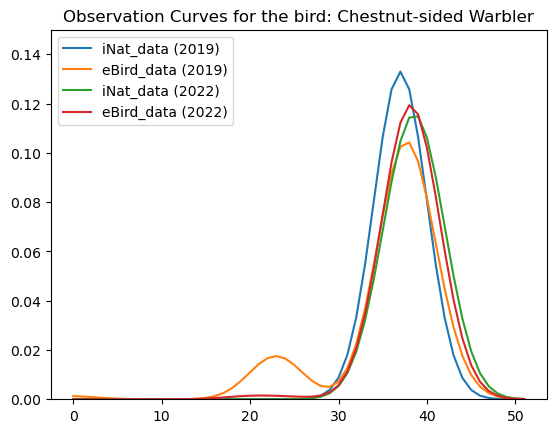

In [105]:
make_smooth_curves('7AB1229B', lims=(0,0.15), sigma=3)

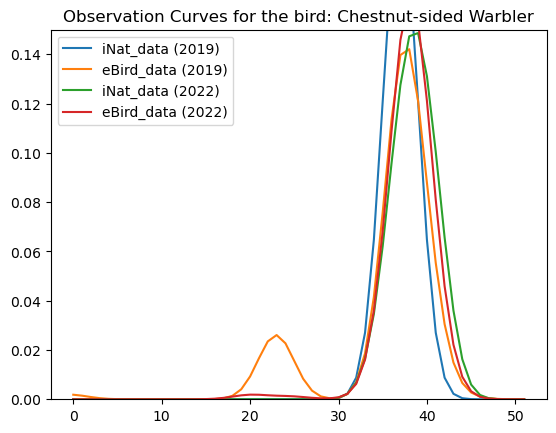

In [106]:
make_smooth_curves('7AB1229B', lims=(0,0.15), sigma=2)

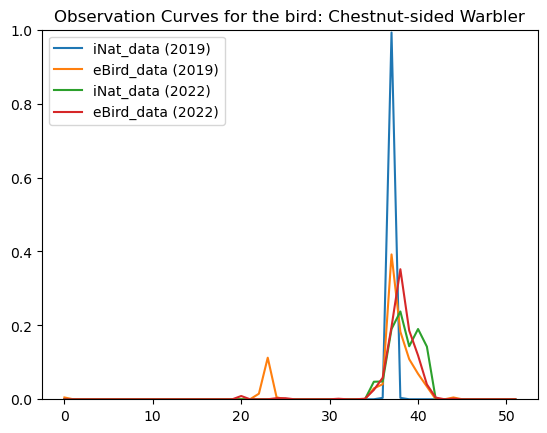

In [107]:
make_smooth_curves('7AB1229B', lims=(0,1), sigma=0.3)

In [108]:
import numpy as np

In [222]:
def make_smooth_curves_rm2wk_iNat(x, sigma=3, lims=(0,0.1)):
    aviID = x
    plt.ylim(lims)
    y1 = iNat_curves_discrete.loc[aviID, :].values.copy()
    y1_22 = iNat_curves_discrete_22.loc[aviID, :].values.copy()
    y1[16:18] = np.mean(y1[13:21])
    y1_22[16:18] = np.mean(y1_22[13:21])
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    )
    y1_smoothed_22 = function_smoothing(
        y1_22,
        sigma=sigma
    )
    y2_smoothed_22 = function_smoothing(
        eBird_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    )
    plt.plot(y1_smoothed, label='iNat_data (2019)')
    plt.plot(y2_smoothed, label='eBird_data (2019)')
    plt.plot(y1_smoothed_22, label='iNat_data (2022)')
    plt.plot(y2_smoothed_22, label='eBird_data (2022)')
    plt.ylabel("Week Number of the year (--->)")
    plt.xlabel("Probability Density")
    
    plt.legend()
    plt.title(f"Observation Curves for the bird: {name_avID_dict[x]}")

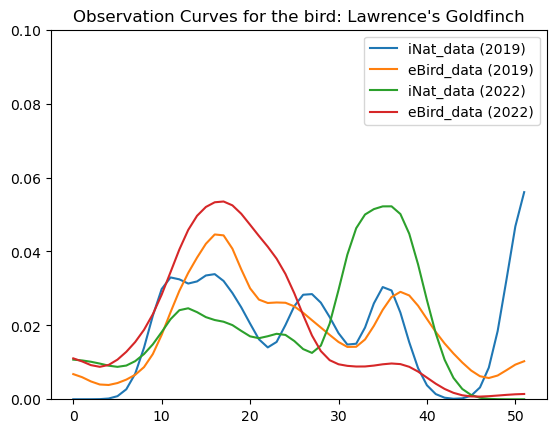

In [110]:
make_smooth_curves_rm2wk_iNat('C27D9E26', lims=(0,0.1), sigma=2)

In [111]:
from scipy.special import kl_div

In [112]:
def generate_kl_div(x, sigma=3):
    aviID = x
    y1 = iNat_curves_discrete.loc[aviID, :].values.copy()
    y1_22 = iNat_curves_discrete_22.loc[aviID, :].values.copy()
    y1[16:18] = np.mean(y1[13:21])
    y1_22[16:18] = np.mean(y1_22[13:21])
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    ) + 0.001
    y2_smoothed = function_smoothing(
        eBird_curves_discrete.loc[aviID, :],
        sigma=sigma
    ) + 0.001
    y1_smoothed_22 = function_smoothing(
        y1_22,
        sigma=sigma
    ) + 0.001
    y2_smoothed_22 = function_smoothing(
        eBird_curves_discrete_22.loc[aviID, :],
        sigma=sigma
    ) + 0.001
    kl_div_inat = (kl_div(y1_smoothed, y1_smoothed_22)).sum()
    kl_div_ebird = (kl_div(y2_smoothed, y2_smoothed_22)).sum()
    kl_div_19 = (kl_div(y1_smoothed, y2_smoothed)).sum()
    kl_div_22 = (kl_div(y1_smoothed_22, y2_smoothed_22)).sum()
    to_return = [
        x,
        kl_div_inat,
        kl_div_ebird,
        kl_div_19,
        kl_div_22
    ]
    return to_return

In [113]:
all_kl_div = []
for bird in common_birds_among_all_filter:
    a = generate_kl_div(bird, sigma=2)
    all_kl_div.append(a)

    

In [114]:
df_all_kl_divs = pd.DataFrame(np.array(all_kl_div))

In [115]:
df_all_kl_divs.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

In [116]:
df_all_kl_divs

,0,1,2,3,4
0,7E327303,0.017053899606837924,0.003483549422725822,0.008285186455893843,0.0338446042509305
1,AA7901D8,0.014964853180516727,0.004439822968152164,0.012338075389128357,0.003427190725112786
2,3647E146,0.42861608481256214,0.07181011967110254,0.14151960991114063,0.2690783188286058
3,9A77D2B0,0.6034300275689051,0.07672147247234046,0.9675549957657043,0.16060031940216365
4,1CBD2CED,0.4194523610524258,0.07904597287171859,0.1991780092930432,0.17602459776515614
...,...,...,...,...,...
255,12E354E2,0.24930400571651742,0.009201082432797497,0.23062380013180145,0.09978204463151857
256,ACB9D1C6,0.12057255684835755,0.0341278947566348,0.24800931298122558,0.14779299503070842
257,06B9BD24,0.040894472948028913,0.022132149537106707,0.056428009423880474,0.019600671712839385
258,F9305BAA,0.03334331462543723,0.027055961110574598,0.046781143094502174,0.03333737300627035


In [117]:
df_all_kl_divs.columns = [
    'AvibaseID',
    'iNat',
    'eBird',
    'Y19',
    'Y22'
]

In [118]:
df_all_kl_divs['iNat'] = df_all_kl_divs['iNat'].astype(float) 
df_all_kl_divs['eBird'] = df_all_kl_divs['eBird'].astype(float) 
df_all_kl_divs['Y19'] = df_all_kl_divs['Y19'].astype(float) 
df_all_kl_divs['Y22'] = df_all_kl_divs['Y22'].astype(float) 

In [119]:
df_all_kl_divs.describe()

,iNat,eBird,Y19,Y22
count,260.000000,260.000000,260.000000,260.000000
mean,0.234234,0.073937,0.125649,0.087085
std,0.422631,0.192235,0.171646,0.117606
min,0.006539,0.002277,0.008238,0.003427
25%,0.033379,0.008453,0.032308,0.019597
50%,0.076962,0.019336,0.058044,0.039760
75%,0.234868,0.050074,0.138742,0.101043
max,3.384553,1.558674,1.292542,0.772442


In [120]:
df_all_kl_divs.sort_values(by='Y22', ascending=False)

,AvibaseID,iNat,eBird,Y19,Y22
31,930E8874,1.091398,0.055521,0.643068,0.772442
41,534FB490,2.057678,0.114230,0.787529,0.586072
112,DB5DABCF,1.380246,0.113167,0.158528,0.534300
78,C27D9E26,0.666676,0.211633,0.226741,0.529112
126,1725B07D,0.162775,0.051786,0.541761,0.527120
...,...,...,...,...,...
208,C235A4D7,0.018103,0.005044,0.026651,0.004328
166,2281F1C7,0.019239,0.004026,0.015379,0.004074
244,68EA281A,0.034812,0.014386,0.009927,0.003974
236,36B3872D,0.016146,0.002683,0.012143,0.003801


In [127]:
eBird_curves_discrete_22

WEEK,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013699,0.034247,0.006849,0.000000,0.000000,0.000000,0.000000,0.006849,0.047945,0.000000
00124D98,0.016357,0.014596,0.015360,0.015912,0.019513,0.022939,0.029908,0.022310,0.019813,0.020955,...,0.011469,0.011595,0.011711,0.012718,0.011508,0.009737,0.009882,0.024178,0.012031,0.026162
00635FF9,0.011645,0.016302,0.010570,0.013436,0.010928,0.020064,0.019706,0.012899,0.014690,0.015944,...,0.013615,0.011824,0.010570,0.013436,0.008957,0.006270,0.005912,0.021856,0.007345,0.013973
01060BFD,0.025568,0.017070,0.021543,0.015729,0.014163,0.018710,0.013492,0.013567,0.009616,0.010585,...,0.019009,0.017294,0.016027,0.019530,0.017667,0.011405,0.010809,0.026165,0.013791,0.033023
018B3169,0.053792,0.049086,0.055003,0.047472,0.037386,0.039268,0.040613,0.044648,0.032948,0.031737,...,0.011700,0.015062,0.037924,0.029451,0.044917,0.028779,0.031872,0.067913,0.040075,0.089295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.029371,0.026586,0.026520,0.027514,0.025990,0.033017,0.031691,0.027979,0.021282,0.024133,...,0.014785,0.013127,0.014188,0.015580,0.018564,0.015315,0.012597,0.041305,0.018100,0.044620
FD2B0309,0.013940,0.013809,0.025907,0.023672,0.019726,0.024855,0.017754,0.020252,0.020121,0.018148,...,0.013546,0.011573,0.015255,0.018280,0.011310,0.007233,0.006049,0.009469,0.011967,0.022357
FED3756C,0.036807,0.037103,0.036068,0.050111,0.032077,0.039246,0.031412,0.026460,0.023208,0.021286,...,0.013304,0.011826,0.017147,0.026164,0.020399,0.014634,0.013599,0.038064,0.018995,0.038877


In [130]:
((eBird_curves_discrete_22 + 0.0001)/1.0052).sum(axis=1)

AVIBASEID
000482C9    1.0
00124D98    1.0
00635FF9    1.0
01060BFD    1.0
018B3169    1.0
           ... 
FC366114    1.0
FD2B0309    1.0
FED3756C    1.0
FF592882    1.0
FFF61080    1.0
Length: 341, dtype: float64

In [179]:
datasets = [iNat_curves_discrete, iNat_curves_discrete_22, eBird_curves_discrete, eBird_curves_discrete_22]
datasets_normalized = []
columns_str = [f"{i}" for i in range(1, 53)]
for dataset_i in datasets:
    dataset_i_norm = (dataset_i + 0.0001)/1.0052
    dataset_i_norm.columns = columns_str
    datasets_normalized.append(dataset_i_norm)
    

In [180]:
from scipy.spatial.distance import jensenshannon

In [181]:
datasets_normalized_smoothed = []

In [182]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

b = np.array([0.5, 1, 2])

In [183]:
a/b.reshape((3,1))

array([[2. , 4. , 6. ],
       [4. , 5. , 6. ],
       [3.5, 4. , 4.5]])

In [186]:
datasets_normalized[1]

,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
AVIBASEID,,,,,,,,,,,,,,,,,,,,,
000482C9,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,...,0.000099,0.000099,0.000099,0.331708,0.000099,0.000099,0.000099,0.000099,0.331708,0.000099
00124D98,0.016814,0.018819,0.019488,0.014139,0.024836,0.022162,0.018819,0.016145,0.022831,0.024836,...,0.010797,0.010797,0.010128,0.014808,0.014139,0.010797,0.012134,0.012134,0.016145,0.016145
00635FF9,0.016680,0.005626,0.000099,0.038787,0.016680,0.027734,0.022207,0.011153,0.016680,0.016680,...,0.011153,0.005626,0.044314,0.022207,0.016680,0.005626,0.022207,0.011153,0.011153,0.005626
01060BFD,0.008304,0.020611,0.008304,0.010355,0.006253,0.002151,0.008304,0.006253,0.004202,0.000099,...,0.010355,0.010355,0.016509,0.010355,0.012407,0.012407,0.010355,0.008304,0.012407,0.018560
018B3169,0.051913,0.083002,0.077820,0.010462,0.026006,0.036369,0.031188,0.041551,0.062276,0.015644,...,0.005281,0.010462,0.020825,0.020825,0.041551,0.015644,0.077820,0.057095,0.036369,0.083002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FC366114,0.016174,0.021532,0.021532,0.017067,0.020639,0.031355,0.023318,0.025104,0.015281,0.019746,...,0.013495,0.009030,0.014388,0.017067,0.013495,0.009030,0.017960,0.008137,0.020639,0.019746
FD2B0309,0.020581,0.005951,0.011803,0.029359,0.017655,0.014729,0.014729,0.023507,0.035211,0.043989,...,0.041063,0.008877,0.014729,0.003025,0.017655,0.011803,0.003025,0.005951,0.023507,0.032285
FED3756C,0.040587,0.020343,0.040587,0.046371,0.027573,0.042033,0.031911,0.034803,0.023235,0.023235,...,0.018897,0.007329,0.023235,0.017451,0.024681,0.013113,0.017451,0.027573,0.036249,0.020343


In [191]:
datasets_normalized[0].sum(axis=1).values.reshape(datasets_normalized[0].shape[0],1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [192]:
for i in range(4):
    if i > 1: 
        datasets_normalized_smoothed.append(datasets_normalized[i])
        continue
    else:
        data = datasets_normalized[i].copy()
        data.values[:, 16] = np.mean(data.values[:, 13:21], axis=1)
        data.values[:, 17] = np.mean(data.values[:, 13:21], axis=1)
        data = data/(data.sum(axis=1).values.reshape((data.shape[0]), 1))
        datasets_normalized_smoothed.append(data)


In [196]:
datasets_normalized[1].sum(axis=1)

AVIBASEID
000482C9    1.0
00124D98    1.0
00635FF9    1.0
01060BFD    1.0
018B3169    1.0
           ... 
FC366114    1.0
FD2B0309    1.0
FED3756C    1.0
FF592882    1.0
FFF61080    1.0
Length: 331, dtype: float64

In [197]:
for i in datasets_normalized_smoothed:
    print(i.shape)

(353, 52)
(331, 52)
(353, 52)
(341, 52)


In [198]:
len(common_birds_among_all_filter)

260

In [202]:
iNat_curves_19_final = datasets_normalized_smoothed[0].loc[common_birds_among_all_filter, :]
iNat_curves_22_final = datasets_normalized_smoothed[1].loc[common_birds_among_all_filter, :]
eBird_curves_19_final = datasets_normalized_smoothed[2].loc[common_birds_among_all_filter, :]
eBird_curves_22_final = datasets_normalized_smoothed[3].loc[common_birds_among_all_filter, :]

In [203]:
iNat_curves_19_final.to_parquet('./generated_data/iNat_curves_19_final.parquet')
iNat_curves_22_final.to_parquet('./generated_data/iNat_curves_22_final.parquet')
eBird_curves_19_final.to_parquet('./generated_data/eBird_curves_19_final.parquet')
eBird_curves_22_final.to_parquet('./generated_data/eBird_curves_22_final.parquet')

In [206]:
jensenshannon(iNat_curves_19_final.values[0, :], iNat_curves_22_final.values[0, :])

0.1545353753610052

In [207]:
def generate_js_dist(x, sigma=2):
    aviID = x
    y1 = iNat_curves_19_final.loc[aviID, :].values.copy()
    y1_22 = iNat_curves_22_final.loc[aviID, :].values.copy()
    y1_smoothed = function_smoothing(
        y1,
        sigma=sigma
    )
    y2_smoothed = function_smoothing(
        eBird_curves_19_final.loc[aviID, :],
        sigma=sigma
    )
    y1_smoothed_22 = function_smoothing(
        y1_22,
        sigma=sigma
    )
    y2_smoothed_22 = function_smoothing(
        eBird_curves_22_final.loc[aviID, :],
        sigma=sigma
    )
    js_dist_inat = (jensenshannon(y1_smoothed, y1_smoothed_22))
    js_dist_ebird = (jensenshannon(y2_smoothed, y2_smoothed_22))
    js_dist_19 = (jensenshannon(y1_smoothed, y2_smoothed))
    js_dist_22 = (jensenshannon(y1_smoothed_22, y2_smoothed_22))
    to_return = [
        x,
        js_dist_inat,
        js_dist_ebird,
        js_dist_19,
        js_dist_22,
    ]
    return to_return

In [208]:
all_js_dist = []
for bird in common_birds_among_all_filter:
    a = generate_js_dist(bird, sigma=2)
    all_js_dist.append(a)

    

In [209]:
df_all_js_dists = pd.DataFrame(np.array(all_js_dist))

In [210]:
df_all_js_dists.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

In [211]:
df_all_js_dists

,0,1,2,3,4
0,7E327303,0.06670290771414913,0.030301320283779708,0.04588574357257456,0.09385540000636639
1,AA7901D8,0.062427018725321845,0.034045014862036864,0.056628304790264775,0.029154913689772296
2,3647E146,0.3269442971269486,0.1379490187200341,0.2033942238004113,0.27768249558300184
3,9A77D2B0,0.36448711745354084,0.1596377411897463,0.4405479512188041,0.21464007163851537
4,1CBD2CED,0.3023279275828896,0.14105136347077332,0.2355827469399066,0.23500969473038733
...,...,...,...,...,...
255,12E354E2,0.27336623945953537,0.048980657976272664,0.26911691165063184,0.1583061684977432
256,ACB9D1C6,0.18083052962494486,0.09496597487269194,0.2861865617544564,0.20339920676983514
257,06B9BD24,0.10362167118886315,0.07663738473070629,0.11992866499921344,0.07246058899060843
258,F9305BAA,0.09468561557333871,0.08323094518310555,0.10956440116597488,0.09117879161530523


In [212]:
df_all_js_dists.columns = [
    'AvibaseID',
    'iNat',
    'eBird',
    'Y19',
    'Y22'
]

In [216]:
df_all_js_dists['iNat'] = df_all_js_dists['iNat'].astype(float) 
df_all_js_dists['eBird'] = df_all_js_dists['eBird'].astype(float) 
df_all_js_dists['Y19'] = df_all_js_dists['Y19'].astype(float) 
df_all_js_dists['Y22'] = df_all_js_dists['Y22'].astype(float) 

In [217]:
df_all_js_dists.describe()

,iNat,eBird,Y19,Y22
count,260.000000,260.000000,260.000000,260.000000
mean,0.191300,0.100552,0.158304,0.131568
std,0.131466,0.090020,0.092499,0.080906
min,0.040133,0.024395,0.037482,0.029155
25%,0.097091,0.047512,0.094915,0.073705
50%,0.146839,0.071560,0.127721,0.104820
75%,0.241610,0.115378,0.203800,0.167602
max,0.719887,0.562660,0.527727,0.443231


In [218]:
df_all_js_dists.sort_values(by='eBird', ascending=False)

,AvibaseID,iNat,eBird,Y19,Y22
53,E1714A09,0.694673,0.562660,0.335374,0.220960
182,C5971E25,0.558827,0.506833,0.174157,0.212238
248,BCBD2EAE,0.551348,0.494170,0.201313,0.167116
242,4AAEF549,0.554477,0.488814,0.174432,0.196711
89,0B1B2EB6,0.127898,0.460767,0.407287,0.301164
...,...,...,...,...,...
225,B59E1863,0.067668,0.027465,0.081795,0.088799
236,36B3872D,0.066603,0.026560,0.056550,0.031892
44,3558066B,0.068320,0.026506,0.075306,0.080136
221,89431E9F,0.052126,0.026037,0.069866,0.080066


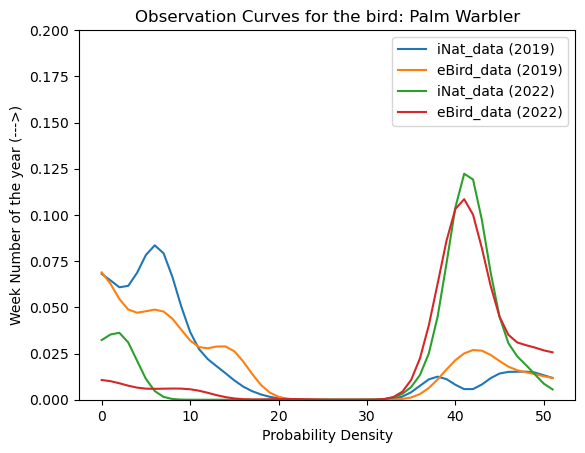

In [224]:
make_smooth_curves_rm2wk_iNat('4AAEF549', lims=(0,0.2), sigma=2)
# plt.ylabel("Week Number of the year (--->)")